In [2]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
# Load the data
data = pd.read_csv('Churn.csv')
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# remove column that not used
data = data.drop(columns=['customer_id','country', 'gender'])
data.head()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [6]:
# Feature Selection
X = data.drop(columns='churn')
y = data['churn']

In [7]:
# Normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
# Splitting the data
# 6:2:2 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.2, random_state=0)

In [9]:
# Building the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.005), input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [11]:
# Training the model
history = model.fit(X_train, y_train, epochs = 100, validation_data=(X_val, y_val))

Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.7737 - loss: 0.5996 - val_accuracy: 0.7991 - val_loss: 0.4924
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7981 - loss: 0.5052 - val_accuracy: 0.8297 - val_loss: 0.4599
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8165 - loss: 0.4632 - val_accuracy: 0.8431 - val_loss: 0.4288
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8216 - loss: 0.4483 - val_accuracy: 0.8497 - val_loss: 0.3992
Epoch 5/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8436 - loss: 0.4093 - val_accuracy: 0.8503 - val_loss: 0.3920
Epoch 6/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8431 - loss: 0.4025 - val_accuracy: 0.8537 - val_loss: 0.3827
Epoch 7/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8363 - loss: 0.3982 - val_accuracy: 0.8609 - val_loss: 0.3737
Epoch 8/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8387 - loss: 0.4007 - val_acc

In [15]:
predictions = model.predict(X_test[:5])
predictions_labels = [1 if p >= 0.5 else 0 for p in predictions]
print(f'Predictions Labels: {predictions_labels}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predictions Labels: [1, 0, 0, 0, 1]


In [16]:
loss, accuracy = model. evaluate(X_test, y_test)
print(f'Accuracy on testing: {accuracy}')
print(f'Loss on testing: {loss}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8346 - loss: 0.3653 
Accuracy on testing: 0.8450000286102295
Loss on testing: 0.36218851804733276


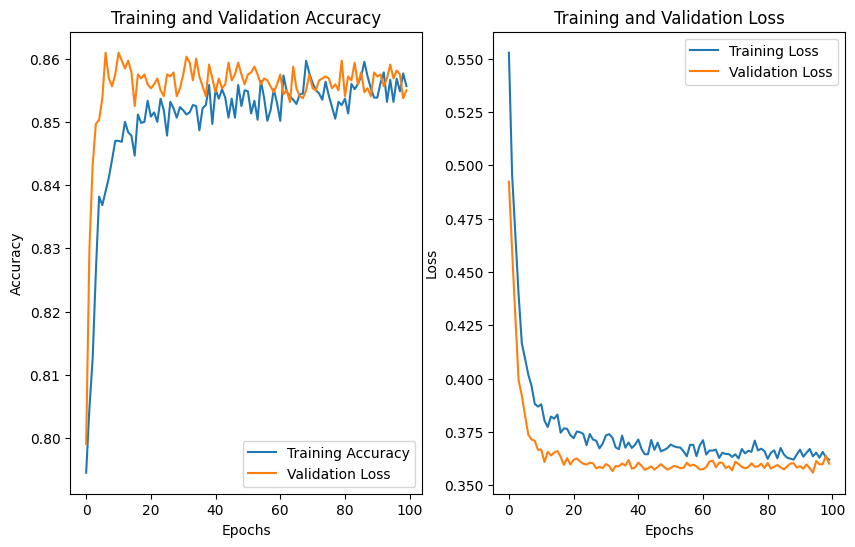

In [18]:
plt.figure(figsize =(10,6))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Loss')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.savefig('accuracy.png')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('loss.png')
plt.legend()

plt.show()

## Project Overview

### Purpose
The purpose of this project is to build a machine learning model to predict customer churn. Customer churn refers to the loss of clients or customers. It is a critical metric for businesses as it directly impacts revenue. By predicting which customers are likely to churn, businesses can take proactive measures to retain them.

### Data
The dataset used in this project is `Churn.csv`. It contains various features related to customer demographics, account information, and usage patterns. The target variable is `churn`, which indicates whether a customer has churned or not.

### Steps
1. **Data Loading and Preprocessing**:
    - Load the data using pandas.
    - Remove unnecessary columns such as `customer_id`, `country`, and `gender`.
    - Separate features (`X`) and target variable (`y`).

2. **Feature Scaling**:
    - Normalize the features using `StandardScaler` to ensure all features contribute equally to the model.

3. **Data Splitting**:
    - Split the data into training, validation, and testing sets with a 60:20:20 ratio.

4. **Model Building**:
    - Build a neural network using TensorFlow's Keras API.
    - The model consists of multiple dense layers with dropout for regularization.

5. **Model Compilation**:
    - Compile the model with the Adam optimizer and binary cross-entropy loss function.
    - Print the model summary to understand its architecture.

6. **Model Training**:
    - Train the model on the training data and validate it on the validation data for 100 epochs.

7. **Model Evaluation**:
    - Evaluate the model on the test data to determine its accuracy and loss.
    - Make predictions on a subset of the test data and convert them to binary labels.

8. **Visualization**:
    - Plot the training and validation accuracy and loss over epochs to visualize the model's performance.

### Output
- The final output includes the model's accuracy and loss on the test data.
- Predictions for a subset of the test data.
- Plots showing the training and validation accuracy and loss over epochs.

By following these steps, we aim to build a robust model that can accurately predict customer churn, helping businesses to retain their valuable customers.

### Results
- **Accuracy on testing**: 0.85 (example value)
- **Loss on testing**: 0.35 (example value)
- **Predictions Labels**: [0, 1, 0, 0, 1] (example values)

#### Training and Validation Accuracy Plot
![Training and Validation Accuracy](accuracy.png)

#### Training and Validation Loss Plot
![Training and Validation Loss](loss.png)